# Apparel Industry Dataset Analysis

In [112]:
%%html
<b><a href="https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees">Dataset Link</a></b>

## Loading and Processing the Dataset

In [13]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('garment_worker_productivity.csv')

# Previewing the dataset
print("Initial dataset shape:", df.shape)
df.head()

Initial dataset shape: (1197, 15)


date   quarter  department       day  team  targeted_productivity  \
0  01-01-2015  Quarter1      sweing  Thursday     8                   0.80   
1  01-01-2015  Quarter1  finishing   Thursday     1                   0.75   
2  01-01-2015  Quarter1      sweing  Thursday    11                   0.80   
3  01-01-2015  Quarter1      sweing  Thursday    12                   0.80   
4  01-01-2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [2]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [14]:
# Remove leading/trailing whitespaces and drop null values
df['department'] = df['department'].str.strip()
df = df.dropna(subset=['department'])

# Confirm unique department values
unique_departments = df['department'].unique()
print("Unique Departments:", unique_departments)

Unique Departments: ['sweing' 'finishing']


In [15]:
# Copying the dataframe for processing
df_new = df.copy()

In [16]:
# Ensure productivity values are between 0 and 1
df_new = df_new[(df_new['actual_productivity'] >= 0) & (df_new['actual_productivity'] <= 1)]
df_new = df_new[(df_new['targeted_productivity'] >= 0) & (df_new['targeted_productivity'] <= 1)]

### Handling Missing Values

In [6]:
# Checking for missing values
print(df_new.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      494
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [17]:
# The 'wip' column is likely to be right-skewed (some teams may have unusually high unfinished items).
# Imputing 'wip' using median to avoid around 40% of data & it is more robust to outliers and better suited for skewed distributions
df_new['wip'] = df_new['wip'].fillna(df_new['wip'].median())

### Data Tranformation

In [18]:
# Converting 'date' column to datetime
df_new['date'] = pd.to_datetime(df_new['date'], format='mixed', dayfirst=False, errors='coerce')
# Check for any parsing failures
print("Unparsed dates:", df_new['date'].isnull().sum())

Unparsed dates: 0


In [19]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## Encoding 'department' column
df_new['department'] = le.fit_transform(df_new['department'])
## Encoding 'quarter' column
df_new['quarter'] = le.fit_transform(df_new['quarter'])
## Encoding 'day' column
df_new['day'] = le.fit_transform(df_new['day'])

In [20]:
# Extract the month from the date column for analysis
df_new['month'] = df_new['date'].dt.month

In [21]:
# Information about the processed dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1160 non-null   datetime64[ns]
 1   quarter                1160 non-null   int64         
 2   department             1160 non-null   int64         
 3   day                    1160 non-null   int64         
 4   team                   1160 non-null   int64         
 5   targeted_productivity  1160 non-null   float64       
 6   smv                    1160 non-null   float64       
 7   wip                    1160 non-null   float64       
 8   over_time              1160 non-null   int64         
 9   incentive              1160 non-null   int64         
 10  idle_time              1160 non-null   float64       
 11  idle_men               1160 non-null   int64         
 12  no_of_style_change     1160 non-null   int64         
 13  no_of_wo

## Exploratory Data Analysis

In [22]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive Statistics

In [125]:
# Statistical summary
stats_summary = df_new.describe()
print("Statistical Summary:")
print(stats_summary)

Statistical Summary:
                                date      quarter   department          day  \
count                           1160  1160.000000  1160.000000  1160.000000   
mean   2015-02-04 10:00:49.655172352     1.400862     0.574138     2.525000   
min              2015-01-01 00:00:00     0.000000     0.000000     0.000000   
25%              2015-01-17 00:00:00     0.000000     0.000000     1.000000   
50%              2015-02-03 00:00:00     1.000000     1.000000     3.000000   
75%              2015-02-24 00:00:00     2.000000     1.000000     4.000000   
max              2015-03-11 00:00:00     4.000000     1.000000     5.000000   
std                              NaN     1.213456     0.494686     1.715602   

              team  targeted_productivity         smv           wip  \
count  1160.000000            1160.000000  1160.00000   1160.000000   
mean      6.544828               0.727905    15.01481   1103.984483   
min       1.000000               0.070000     2.90000 

### Data Distribution

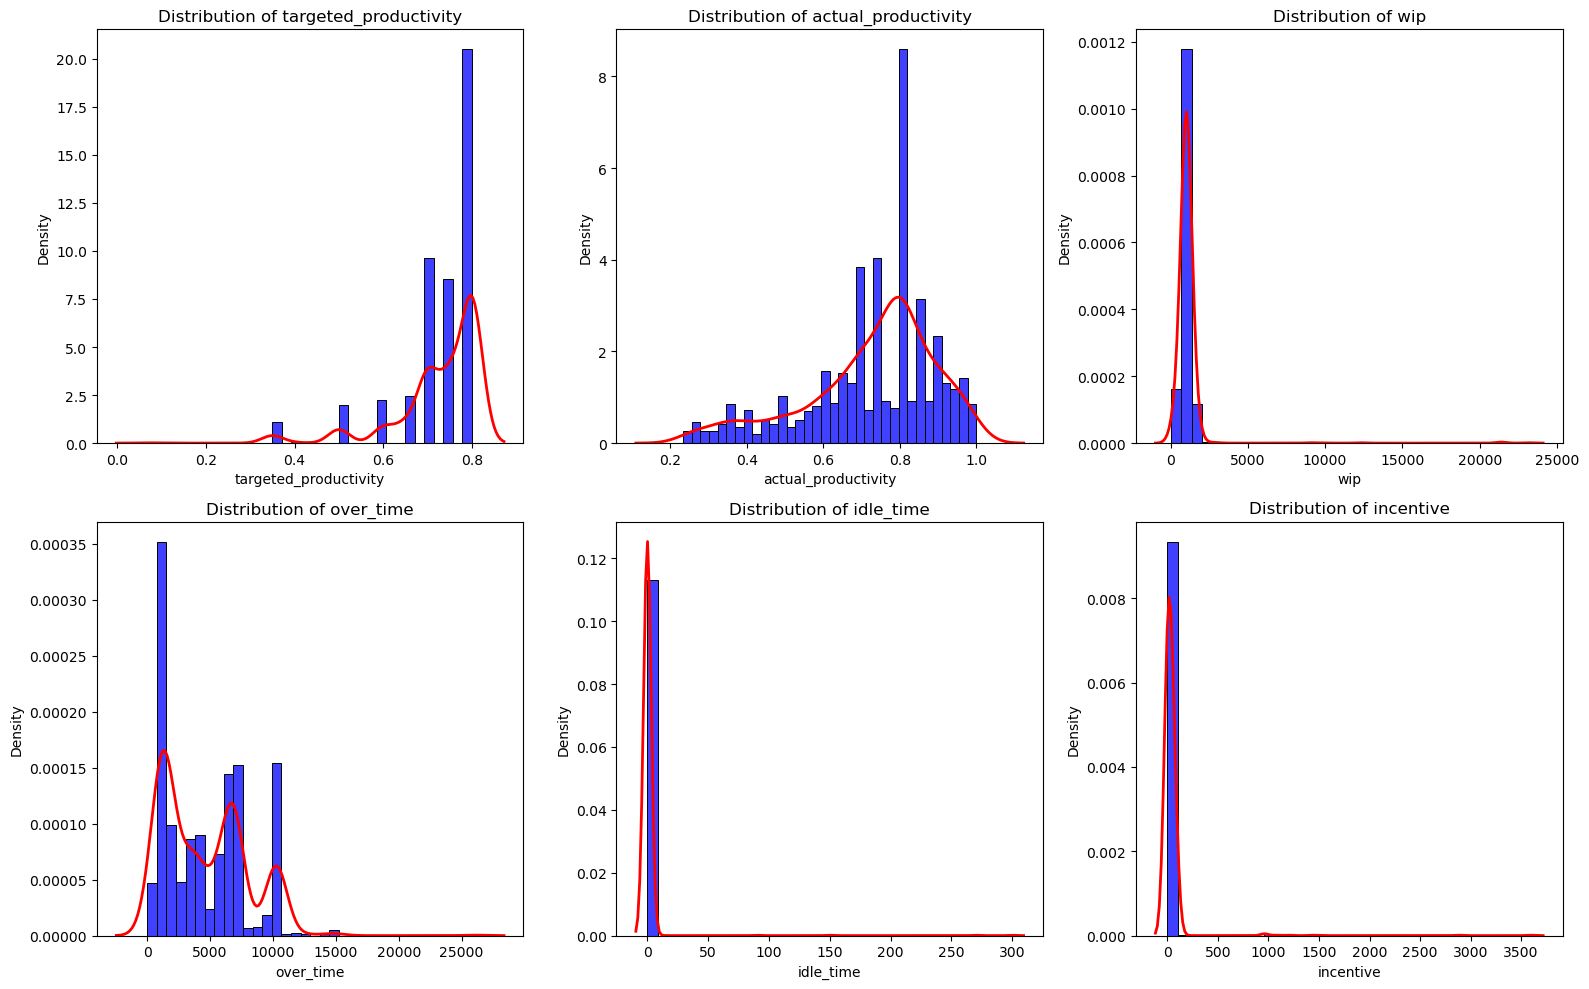

In [206]:
# List of numerical columns
num_cols = ['targeted_productivity', 'actual_productivity', 'wip', 'over_time', 'idle_time', 'incentive']

# Create subplots 
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  

# Loop through the columns and plot each distribution
for i, col in enumerate(num_cols):
    row, col_pos = divmod(i, 3)  # Determine row and column position in subplot grid
    bins_count = int(len(df_new[col])**0.5)  # Rule of thumb for bin count
    sns.histplot(df_new[col], bins=bins_count, color='blue', stat='density', ax=axes[row, col_pos])  # Histogram
    sns.kdeplot(df_new[col], color='red', linewidth=2, ax=axes[row, col_pos])  # KDE overlay
    axes[row, col_pos].set_title(f"Distribution of {col}")
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel("Density")

# Remove unused subplot grids if any
for j in range(len(num_cols), 6):  
    fig.delaxes(axes[j // 3, j % 3])  # Delete extra axes

plt.tight_layout()
plt.show()

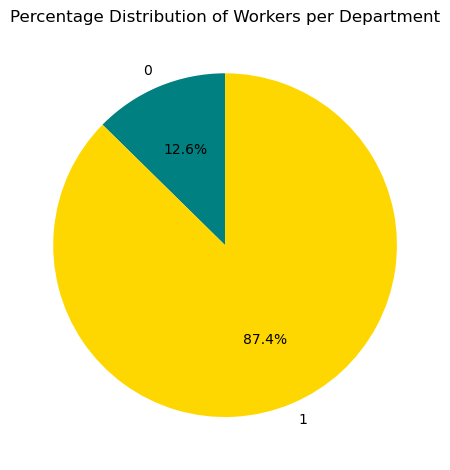

In [127]:
# Group data by department and calculate the sum of workers
department_workers = df_new.groupby('department')['no_of_workers'].sum().reset_index()

# Create the pie chart using department workers' data
plt.pie(department_workers['no_of_workers'], labels=department_workers['department'], autopct='%1.1f%%', startangle=90, colors=['teal', 'gold', 'skyblue', 'lightcoral'])

# Add title
plt.title('Percentage Distribution of Workers per Department')

plt.tight_layout()

# Display the graph
plt.show()

### Relationship Between Variables

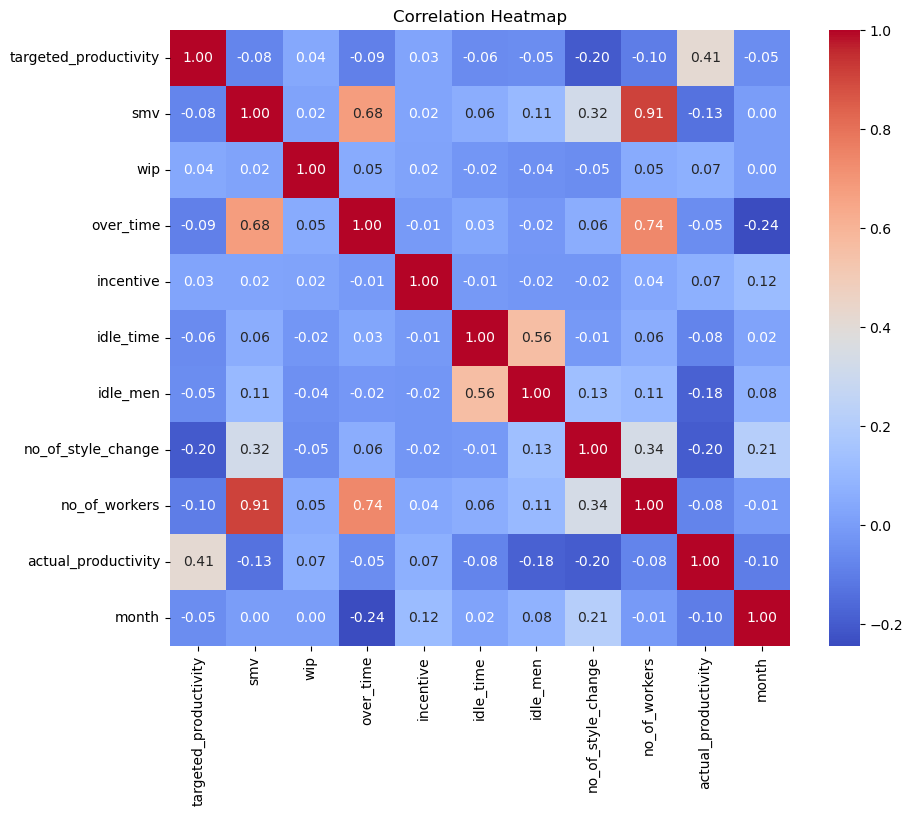

In [128]:
# Correlation matrix
df_new_corr = df_new.drop(df_new.iloc[:, :5], axis=1)
correlation_matrix = df_new_corr.corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Productivity Analysis

#### Time-Based Analysis of Productivity

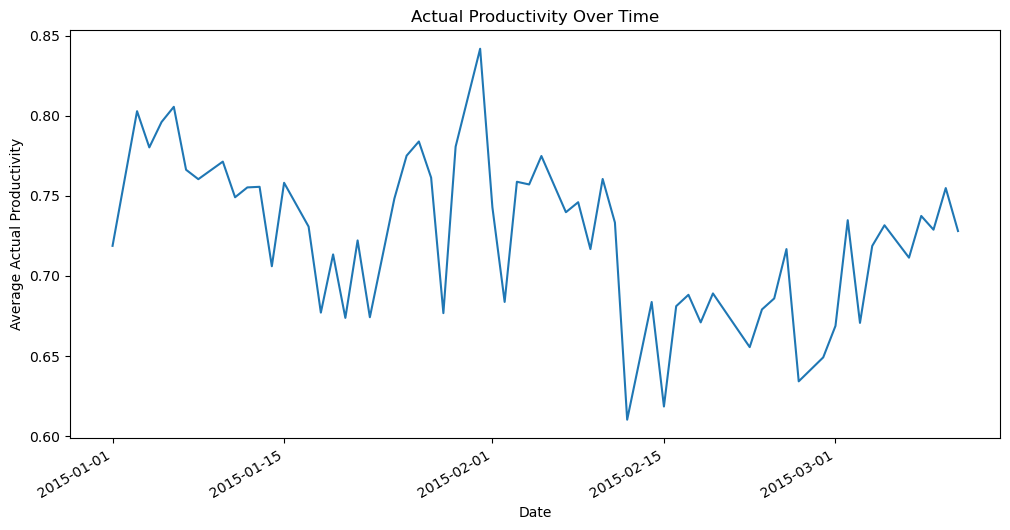

In [129]:
# Productivity over time
plt.figure(figsize=(12, 6))
df_new.groupby('date')['actual_productivity'].mean().plot()
plt.title("Actual Productivity Over Time")
plt.xlabel("Date")
plt.ylabel("Average Actual Productivity")
plt.show()

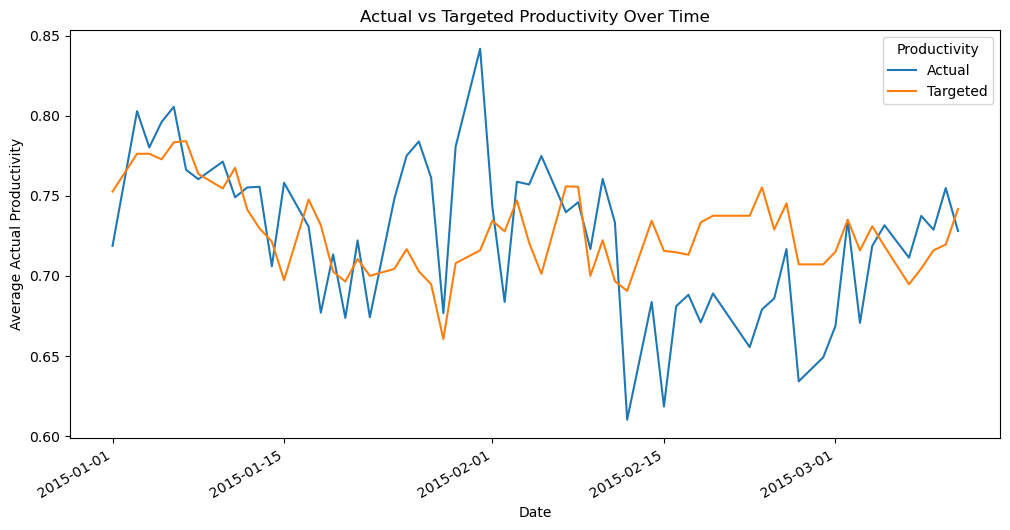

In [130]:
plt.figure(figsize=(12, 6))
df_new.groupby('date')['actual_productivity'].mean().plot()
df_new.groupby('date')['targeted_productivity'].mean().plot()
plt.title("Actual vs Targeted Productivity Over Time")
plt.xlabel("Date")
plt.ylabel("Average Actual Productivity")
plt.legend(title="Productivity", labels=["Actual", "Targeted"], fontsize=10)
plt.show()

#### Temporal Analysis

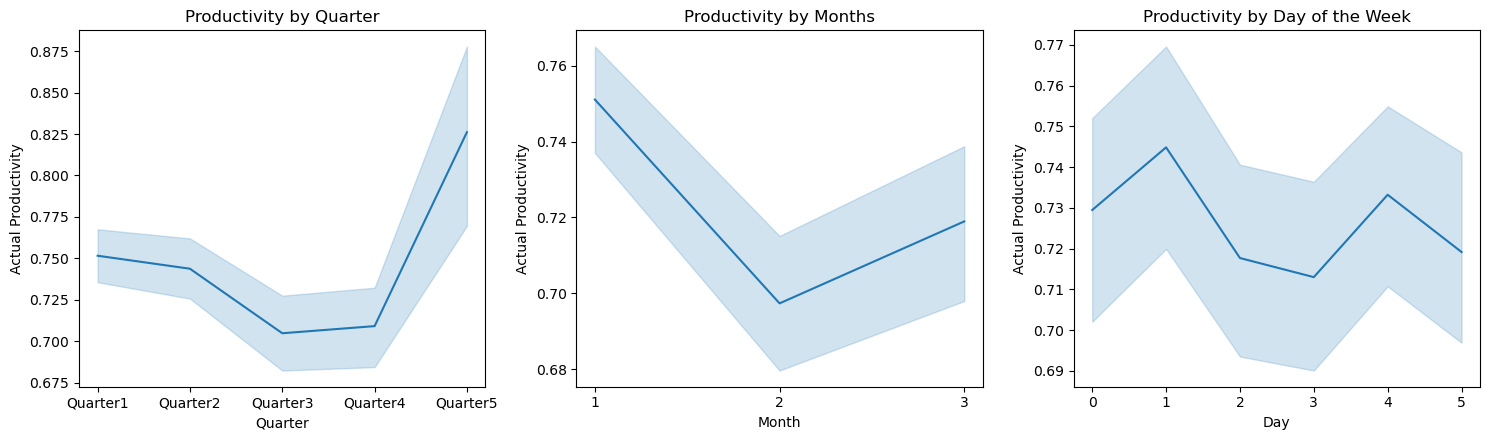

In [131]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5)) 

# Quarterly trends
sns.lineplot(x='quarter', y='actual_productivity', data=df, ax=axes[0])
axes[0].set_title("Productivity by Quarter")
axes[0].set_xlabel("Quarter")
axes[0].set_ylabel("Actual Productivity")

# Monthly trends
sns.lineplot(x='month', y='actual_productivity', data=df_new, ax=axes[1])
x = np.linspace(1, 3)  # linespace range
axes[1].set_xticks(ticks=range(int(x.min()), int(x.max()) + 1))  # Set ticks to integers
axes[1].set_title("Productivity by Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Actual Productivity")

# Day-wise trends
sns.lineplot(x='day', y='actual_productivity', data=df_new, ax=axes[2])
axes[2].set_title("Productivity by Day of the Week")
axes[2].set_xlabel("Day")
axes[2].set_ylabel("Actual Productivity")

plt.tight_layout()
plt.show()

#### Productivity Analysis by Department

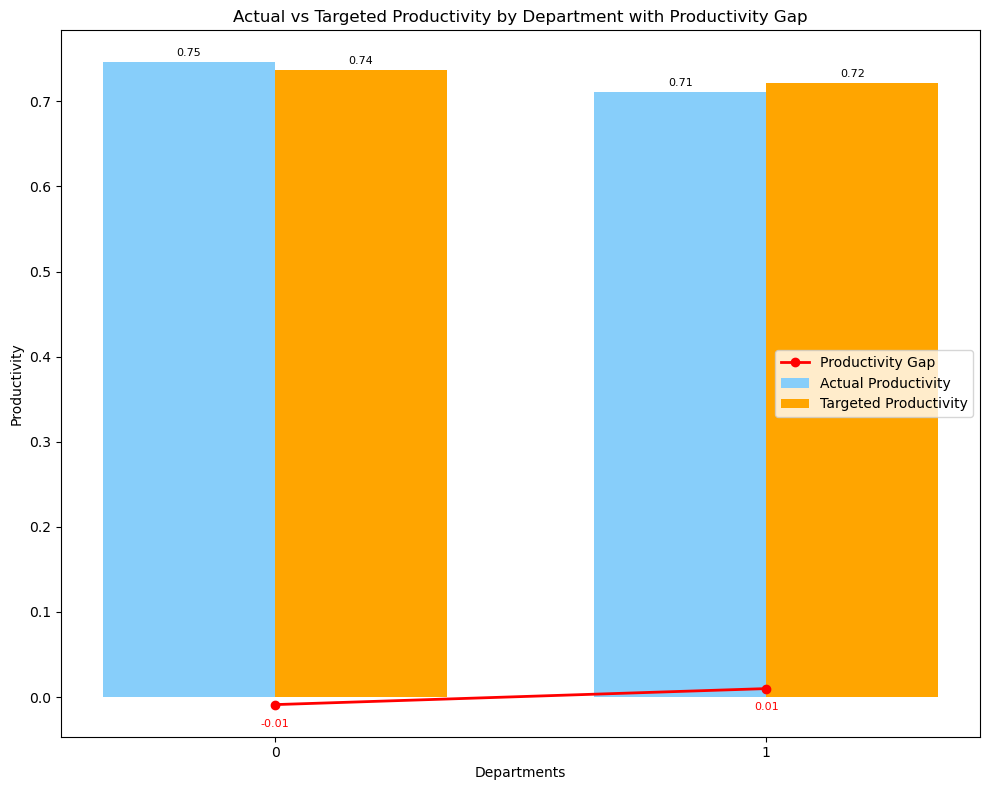

In [132]:
# Group data by department and calculate average productivity
grouped_data = df_new.groupby('department')[['actual_productivity', 'targeted_productivity']].mean().reset_index()

# Calculate productivity gap
grouped_data['productivity_gap'] = grouped_data['targeted_productivity'] - grouped_data['actual_productivity']

# Plot grouped bar chart
departments = grouped_data['department']
x = np.arange(len(departments))  # X-axis positions
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 8))

# Actual productivity bars
rects1 = ax.bar(x - width/2, grouped_data['actual_productivity'], width, label='Actual Productivity', color='lightskyblue')

# Targeted productivity bars
rects2 = ax.bar(x + width/2, grouped_data['targeted_productivity'], width, label='Targeted Productivity', color='orange')

# Add gap line
ax.plot(x, grouped_data['productivity_gap'], label='Productivity Gap', color='red', marker='o', linestyle='-', linewidth=2)

# Add labels, title, and legend
ax.set_xlabel('Departments')
ax.set_ylabel('Productivity')
ax.set_title('Actual vs Targeted Productivity by Department with Productivity Gap')
ax.set_xticks(x)
ax.set_xticklabels(departments, rotation=0)
ax.legend()

# Annotate bars with values
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

annotate_bars(rects1)
annotate_bars(rects2)

# Annotate gap points on the line
for i, gap in enumerate(grouped_data['productivity_gap']):
    ax.annotate(f'{gap:.2f}', 
                xy=(x[i], gap),
                xytext=(0, -10),
                textcoords="offset points",
                ha='center', va='top', fontsize=8, color='red')

plt.tight_layout()
plt.show()

### Overtime Analysis

#### Time-Based Analysis

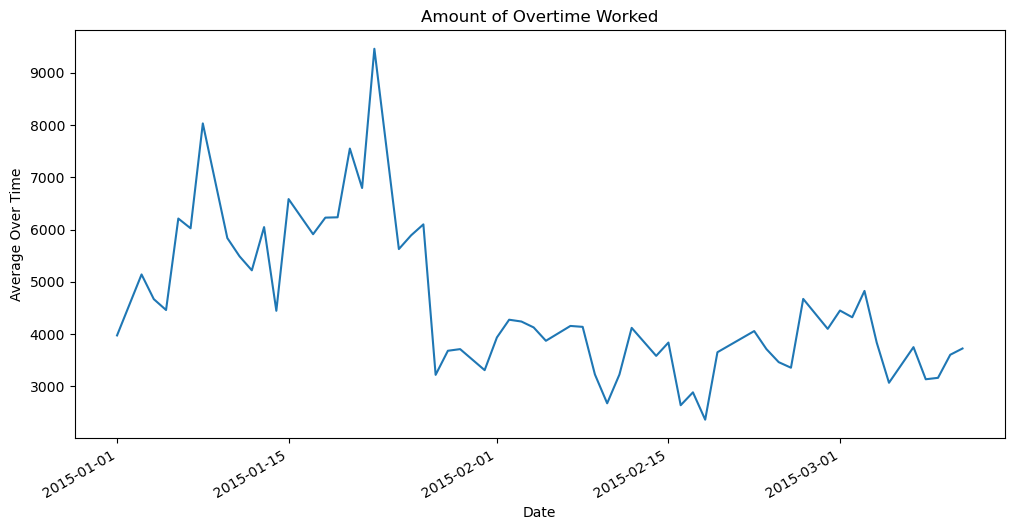

In [133]:
# Productivity over time
plt.figure(figsize=(12, 6))
df_new.groupby('date')['over_time'].mean().plot()
plt.title("Amount of Overtime Worked")
plt.xlabel("Date")
plt.ylabel("Average Over Time")
plt.show()

#### Department Wise Analysis

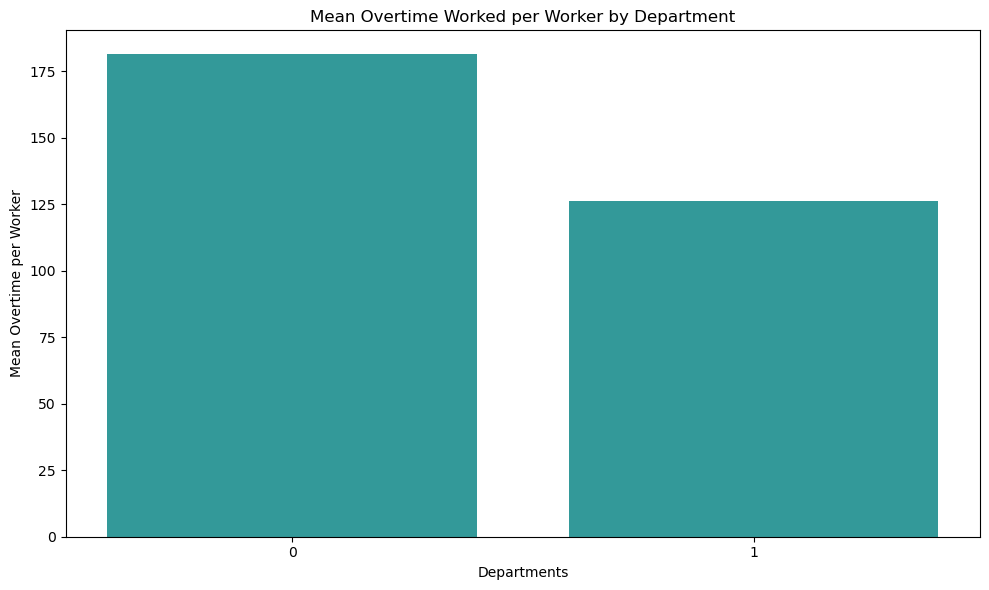

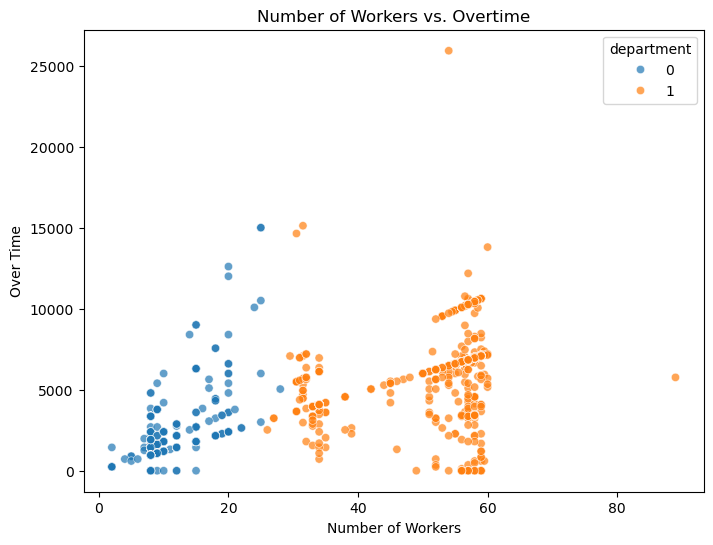

In [134]:
# Group data by department and calculate mean overtime per worker
df_new['overtime_per_worker'] = df_new['over_time'] / df_new['no_of_workers']
mean_overtime = df_new.groupby('department')['overtime_per_worker'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(mean_overtime['department'], mean_overtime['overtime_per_worker'], color='teal', alpha=0.8)

# Add labels, title, and customization
plt.xlabel('Departments')
plt.ylabel('Mean Overtime per Worker')
plt.title('Mean Overtime Worked per Worker by Department')
plt.xticks(ticks = mean_overtime['department'], labels = mean_overtime['department'], rotation=0)  # Use department codes
plt.tight_layout()

# Scatter plot with no_of_workers on the x-axis and wip on the y-axis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='no_of_workers', y='over_time', data=df_new, hue = 'department', alpha=0.7)

# Add title and labels
plt.title("Number of Workers vs. Overtime")
plt.xlabel("Number of Workers")
plt.ylabel("Over Time")

plt.show()

### Idle Time Analysis

#### Time-Based Analysis

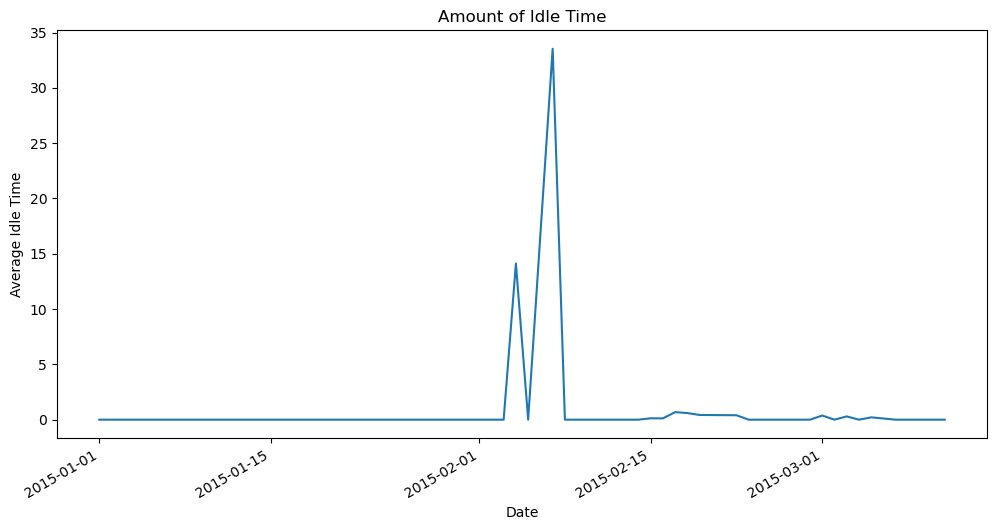

In [135]:
# Time Spent Idealy
plt.figure(figsize=(12, 6))
df_new.groupby('date')['idle_time'].mean().plot()
plt.title("Amount of Idle Time")
plt.xlabel("Date")
plt.ylabel("Average Idle Time")
plt.show()

#### Department Wise Analysis

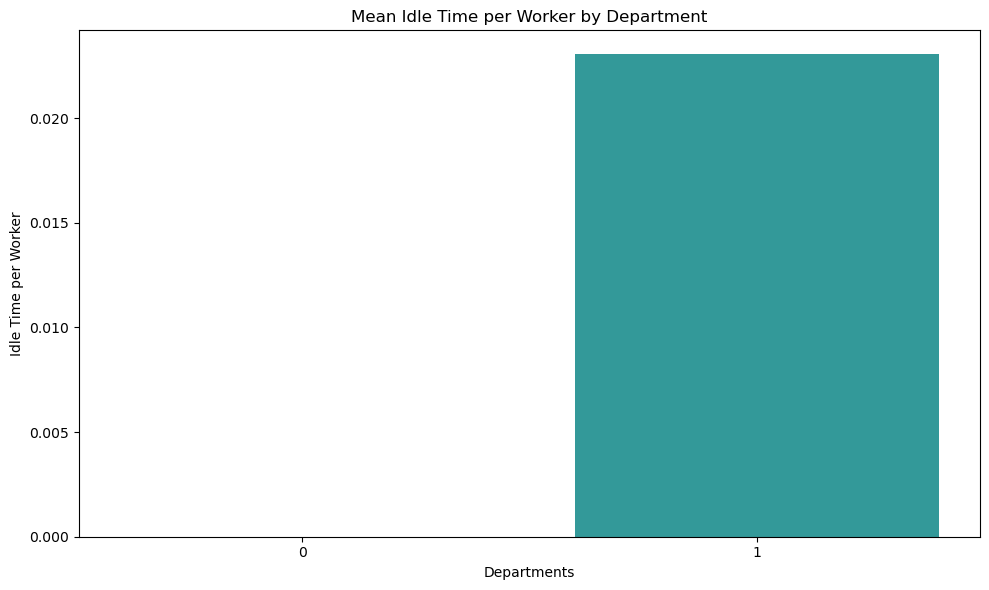

In [136]:
# Group data by department and calculate mean idle time per worker
df_new['idle_time_per_worker'] = df_new['idle_time'] / df_new['no_of_workers']
mean_idle_time = df_new.groupby('department')['idle_time_per_worker'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(mean_idle_time['department'], mean_idle_time['idle_time_per_worker'], color='teal', alpha=0.8)

# Add labels, title, and customization
plt.xlabel('Departments')
plt.ylabel('Idle Time per Worker')
plt.title('Mean Idle Time per Worker by Department')
plt.xticks(ticks = mean_idle_time['department'], labels = mean_idle_time['department'], rotation=0)  # Use department codes
plt.tight_layout()

# Display the graph
plt.show()

### Incentive Analysis

#### Department-wise Analysis

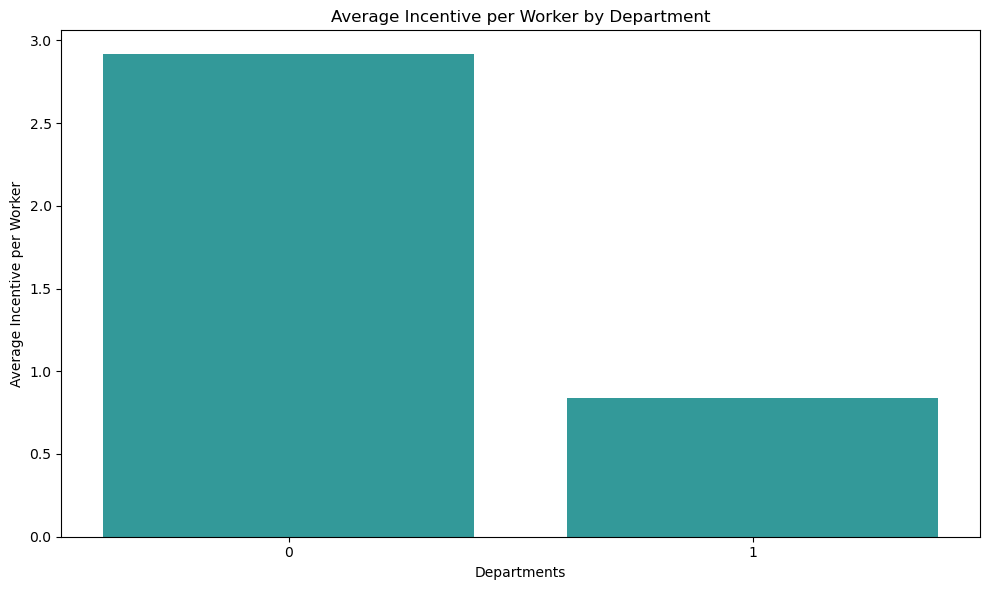

In [137]:
# Department Wise Incentive anlysis
# Group data by department and calculate mean incentive per worker
df_new['incentive_per_worker'] = df_new['incentive'] / df_new['no_of_workers']
mean_incentive = df_new.groupby('department')['incentive_per_worker'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(mean_incentive['department'], mean_incentive['incentive_per_worker'], color='teal', alpha=0.8)

# Add labels, title, and customization
plt.xlabel('Departments')
plt.ylabel('Average Incentive per Worker')
plt.title('Average Incentive per Worker by Department')
plt.xticks(ticks = mean_incentive['department'], labels = mean_incentive['department'], rotation=0)  # Use department codes
plt.tight_layout()

# Display the graph
plt.show()

#### Assessing Correlations

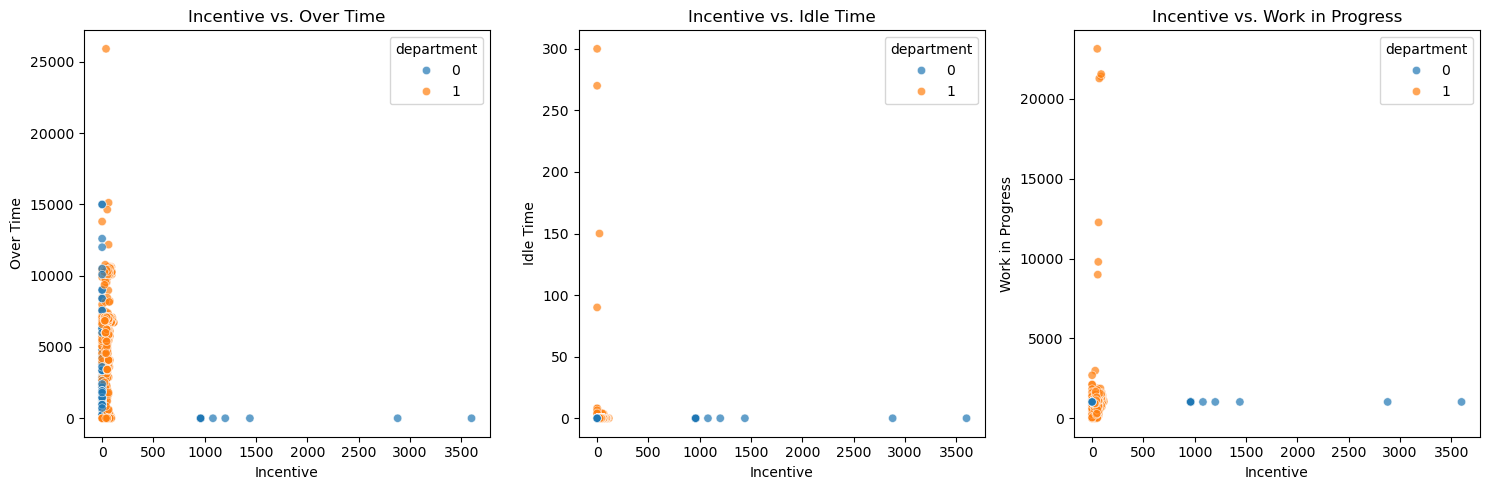

In [138]:
# Create subplots (1 rows, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Incentives correlation with Over Time
sns.scatterplot(x='incentive', y='over_time', hue='department', data=df_new, alpha=0.7, ax=axes[0])
axes[0].set_title("Incentive vs. Over Time")
axes[0].set_xlabel("Incentive")
axes[0].set_ylabel("Over Time")

# Incentives correlation with Idle Time
sns.scatterplot(x='incentive', y='idle_time', hue='department', data=df_new, alpha=0.7, ax=axes[1])
axes[1].set_title("Incentive vs. Idle Time")
axes[1].set_xlabel("Incentive")
axes[1].set_ylabel("Idle Time")

# Incentives correlation with Work in Progress
sns.scatterplot(x='incentive', y='wip', hue='department', data=df_new, alpha=0.7, ax=axes[2])
axes[2].set_title("Incentive vs. Work in Progress")
axes[2].set_xlabel("Incentive")
axes[2].set_ylabel("Work in Progress")

plt.tight_layout()
plt.show()

### Analysisng Effect of Time Allocated to Tasks

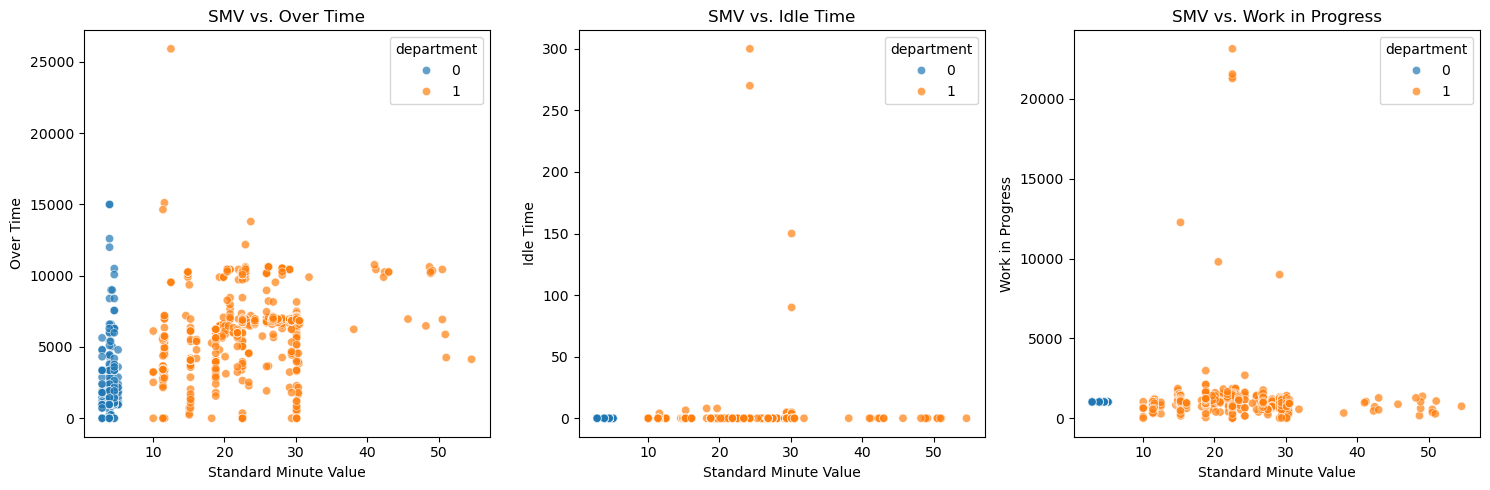

In [139]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# SMV correlation with Over Time
sns.scatterplot(x='smv', y='over_time', hue='department', data=df_new, alpha=0.7, ax=axes[0])
axes[0].set_title("SMV vs. Over Time")
axes[0].set_xlabel("Standard Minute Value")
axes[0].set_ylabel("Over Time")

# SMV correlation with Idle Time
sns.scatterplot(x='smv', y='idle_time', hue='department', data=df_new, alpha=0.7, ax=axes[1])
axes[1].set_title("SMV vs. Idle Time")
axes[1].set_xlabel("Standard Minute Value")
axes[1].set_ylabel("Idle Time")

# SMV correlation with Idle Time
sns.scatterplot(x='smv', y='wip', data=df_new, hue='department', alpha=0.7, ax=axes[2])
axes[2].set_title("SMV vs. Work in Progress")
axes[2].set_xlabel("Standard Minute Value")
axes[2].set_ylabel("Work in Progress")

plt.tight_layout()
plt.show()

### Work in Progress Analysis

#### Time-Based Analysis

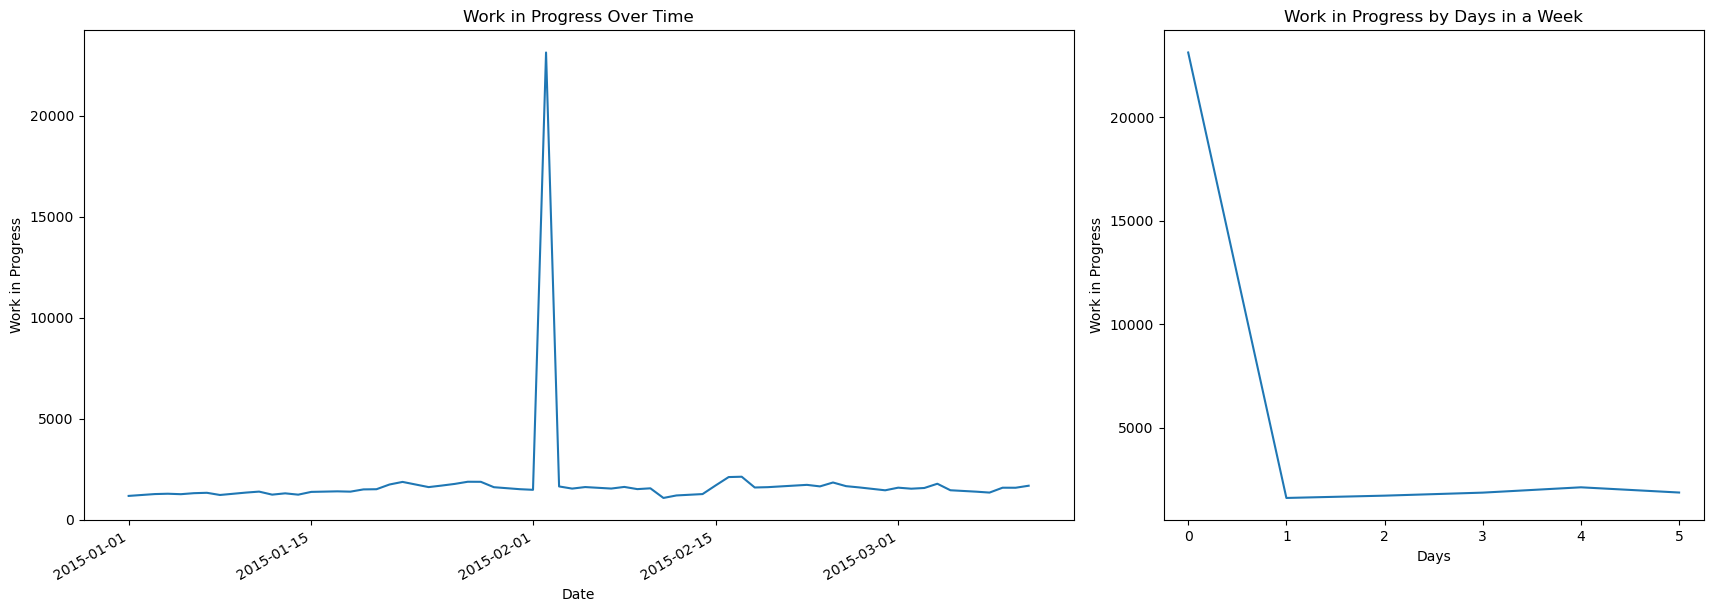

In [140]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # Overall figure size

# Work in Progress Over Time (First Graph)
df_new.groupby('date')['wip'].max().plot(ax=axes[0])  # Plot on the first axis
axes[0].set_title("Work in Progress Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Work in Progress")
axes[0].set_position([0.05, 0.2, 0.55, 0.7])  # [left, bottom, width, height] - Larger width

# Work in Progress by Days in a Week (Second Graph)
df_new.groupby('day')['wip'].max().plot(ax=axes[1])  # Plot on the second axis
axes[1].set_title("Work in Progress by Days in a Week")
axes[1].set_xlabel("Days")
axes[1].set_ylabel("Work in Progress")
axes[1].set_position([0.65, 0.2, 0.3, 0.7])  # [left, bottom, width, height] - Smaller width

plt.show()

#### Assessing Correlations

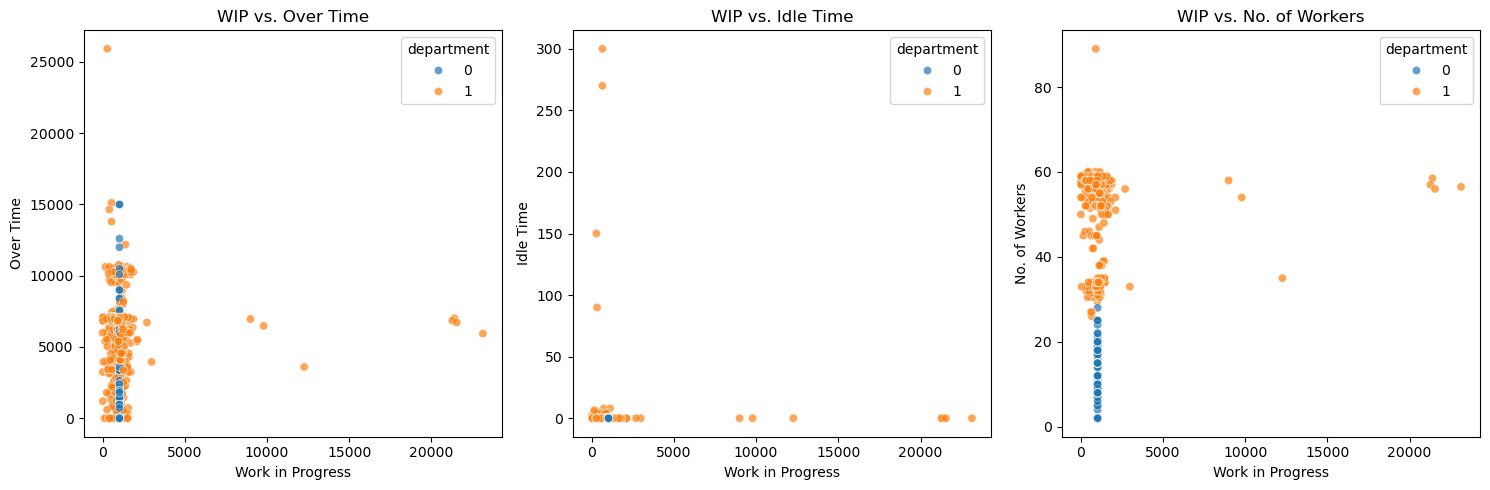

In [141]:
# Create subplots (2 rows, 1 column)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# WIP correlation with Over Time
sns.scatterplot(x='wip', y='over_time', hue='department', data=df_new, alpha=0.7, ax=axes[0])
axes[0].set_title("WIP vs. Over Time")
axes[0].set_xlabel("Work in Progress")
axes[0].set_ylabel("Over Time")

# WIP correlation with Idle Time
sns.scatterplot(x='wip', y='idle_time', hue='department', data=df_new, alpha=0.7, ax=axes[1])
axes[1].set_title("WIP vs. Idle Time")
axes[1].set_xlabel("Work in Progress")
axes[1].set_ylabel("Idle Time")

# WIP correlation with No. of Workers
sns.scatterplot(x='wip', y='no_of_workers', data=df_new, hue='department', alpha=0.7, ax=axes[2])
axes[2].set_title("WIP vs. No. of Workers")
axes[2].set_xlabel("Work in Progress")
axes[2].set_ylabel("No. of Workers")

plt.tight_layout()
plt.show()

### Advanced Correlation

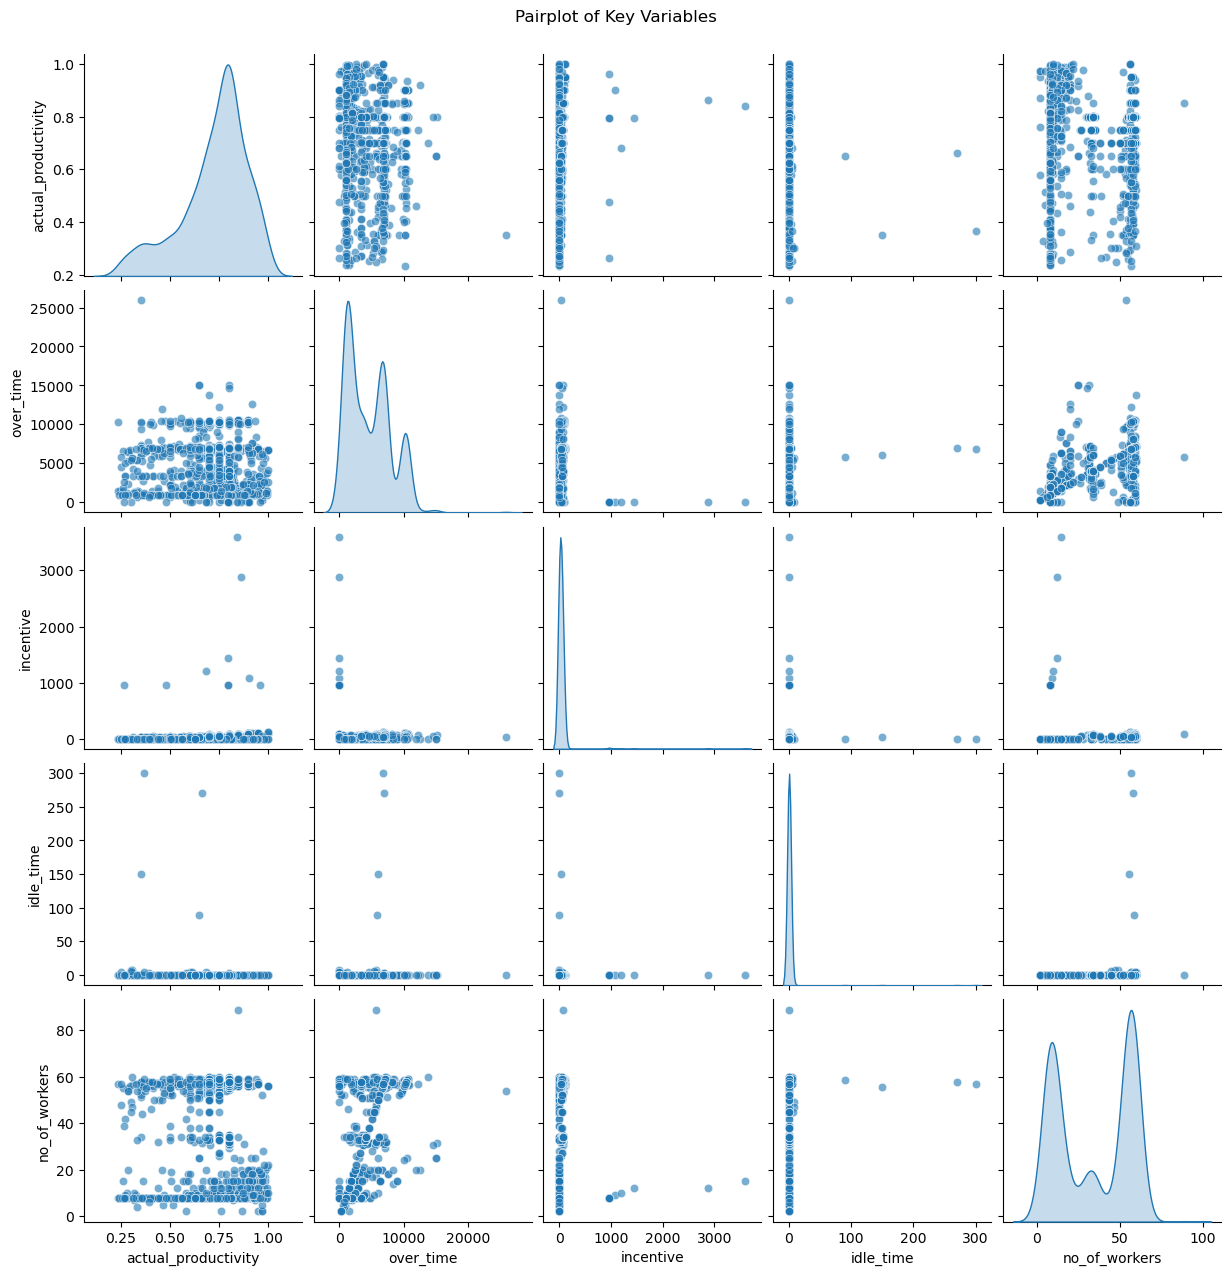

In [30]:
# Pair plot for selected variables
selected_features = ['actual_productivity', 'over_time', 'incentive', 'idle_time', 'no_of_workers']
sns.pairplot(df_new[selected_features], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

## Key Factor Analysis

### Finding Correlations

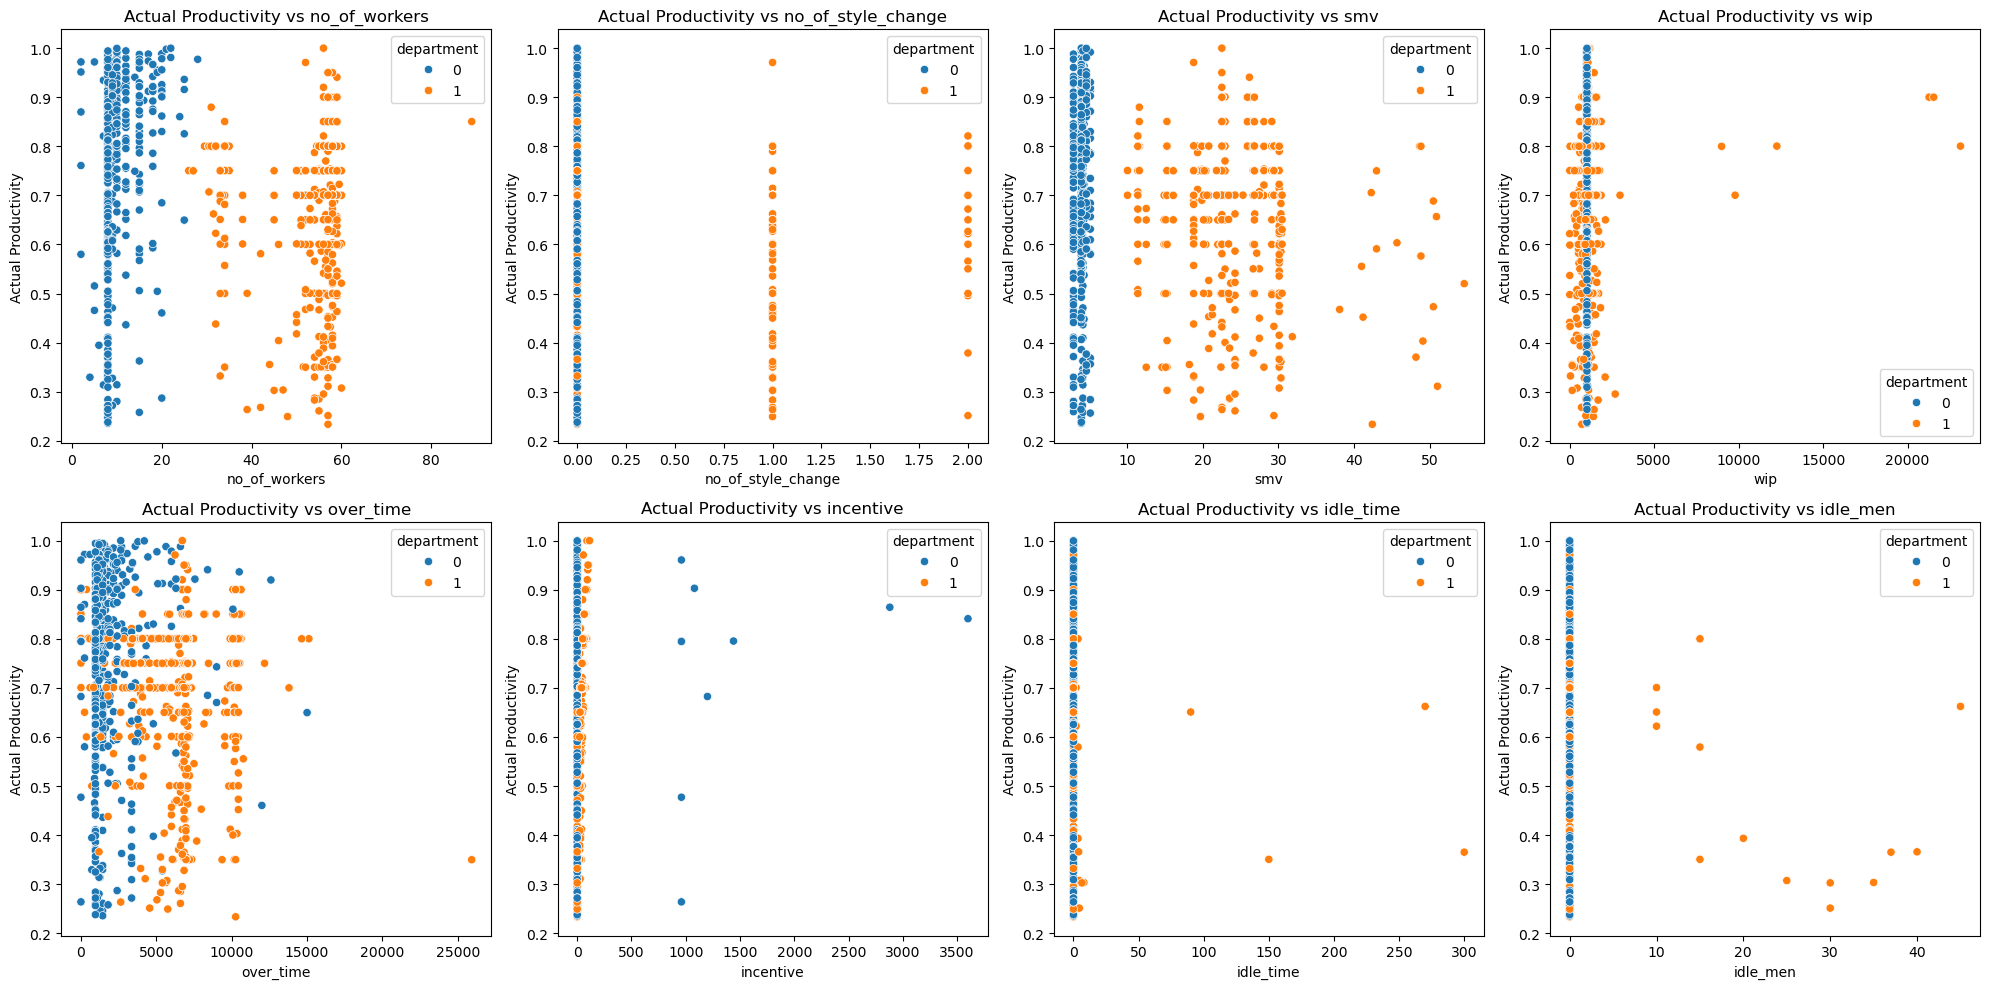

In [207]:
# List of numerical features to plot
numeric_features = ['no_of_workers', 'no_of_style_change', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men']

# Set up the subplot grid
num_features = len(numeric_features)
cols = 4  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate required rows
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Create scatterplots
for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=df_new, x=feature, y='actual_productivity', hue = 'department', ax=axes[i])
    axes[i].set_title(f'Actual Productivity vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Actual Productivity')

# Remove unused axes
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Importance

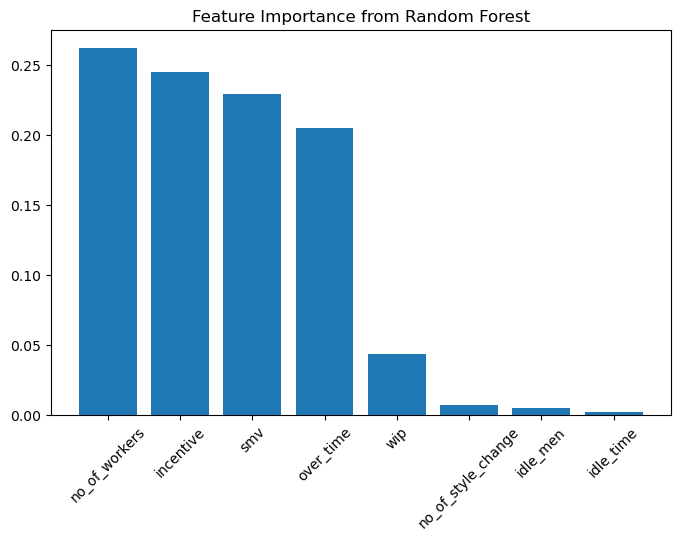

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features and target
features = ['no_of_workers', 'no_of_style_change', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men']
X = df_new[features]
y = df_new['actual_productivity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importance from Random Forest")
plt.show()

### Interactions of Variable and Productivity

#### Overtime vs Incentive on Productivity

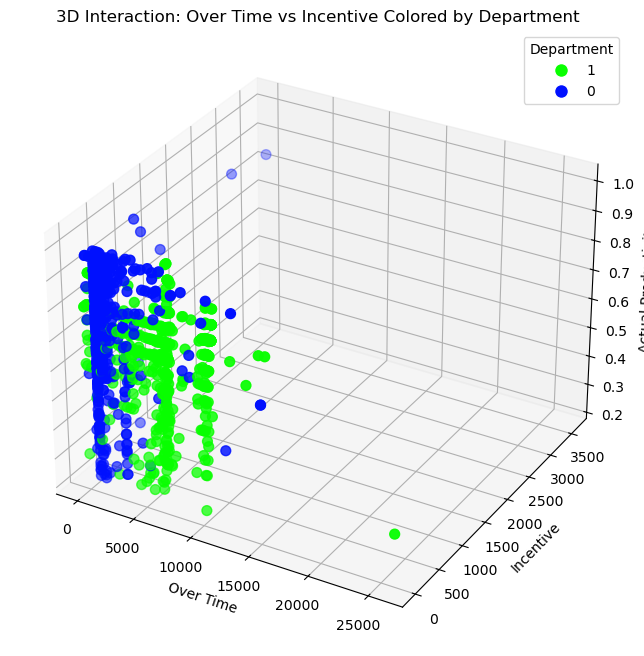

In [144]:
from mpl_toolkits.mplot3d import Axes3D

# Choose the variables to plot
x = df_new['over_time']
y = df_new['incentive']
z = df_new['actual_productivity']
departments = df_new['department']

# Map each department to a color using seaborn's color palette
unique_departments = departments.unique()
palette = sns.color_palette('hsv', len(unique_departments))
color_dict = dict(zip(unique_departments, palette))
colors = departments.map(color_dict)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, s=50)

ax.set_xlabel('Over Time')
ax.set_ylabel('Incentive')
ax.set_zlabel('Actual Productivity')
ax.set_title('3D Interaction: Over Time vs Incentive Colored by Department')

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=dept,
                      markerfacecolor=color_dict[dept], markersize=10) for dept in unique_departments]
ax.legend(handles=handles, title='Department', loc='best')

plt.show()

#### Standard Minute Value (SMV) vs Work in Progress (WIP) on Productivity

C:\Users\BHAVYA\AppData\Local\Temp\ipykernel_24604\1210471832.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_temp.groupby(['smv_bin', 'wip_bin'])['actual_productivity'].mean().unstack()


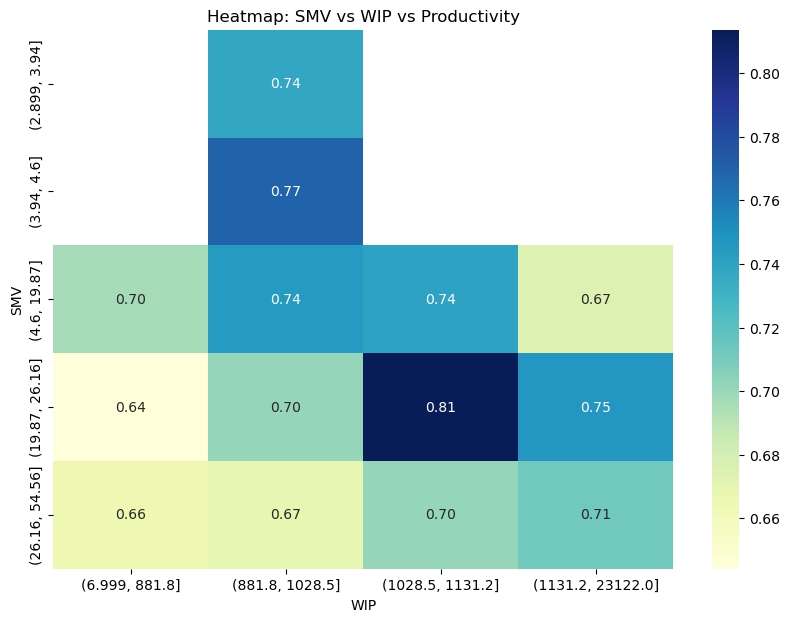

In [91]:
df_temp = df_new.copy()
df_temp['smv_bin'] = pd.qcut(df_temp['smv'], 5, duplicates='drop')
df_temp['wip_bin'] = pd.qcut(df_temp['wip'], 5, duplicates='drop')

pivot = df_temp.groupby(['smv_bin', 'wip_bin'])['actual_productivity'].mean().unstack()

plt.figure(figsize=(10, 7))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap: SMV vs WIP vs Productivity')
plt.xlabel('WIP')
plt.ylabel('SMV')
plt.show()

#### Quarter vs Overtime on Productivity

C:\Users\BHAVYA\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
C:\Users\BHAVYA\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:131: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (values, group) in enumerate(plot_data.groupby('trace')):


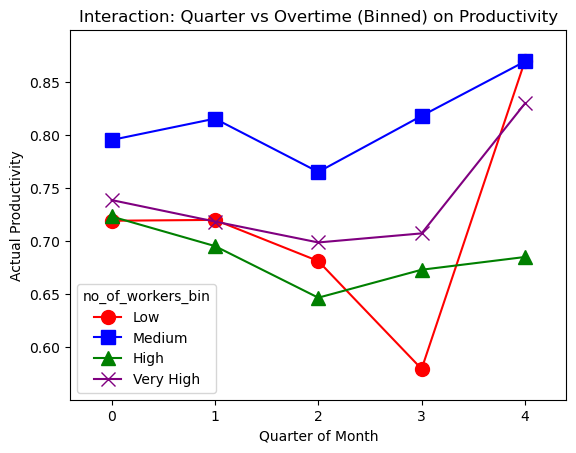

In [101]:
from statsmodels.graphics.factorplots import interaction_plot

# Bin over_time into categories
df_new['no_of_workers_bin'] = pd.qcut(df_new['no_of_workers'], q=4, labels=["Low", "Medium", "High", "Very High"])

# Now plot the interaction: quarter vs over_time_bin on productivity
interaction_plot(
    x=df_new['quarter'],                   # x-axis (should be categorical)
    trace=df_new['no_of_workers_bin'],         # lines (categorical after binning)
    response=df_new['actual_productivity'],
    colors=['red', 'blue', 'green', 'purple'],   # Must match number of trace levels (4 here)
    markers=['o', 's', '^', 'x'],                # Also must be 4
    ms=10
)

plt.title("Interaction: Quarter vs Overtime (Binned) on Productivity")
plt.xlabel("Quarter of Month")
plt.ylabel("Actual Productivity")
plt.show()

#### No. of Workers vs Incentive on Productivity

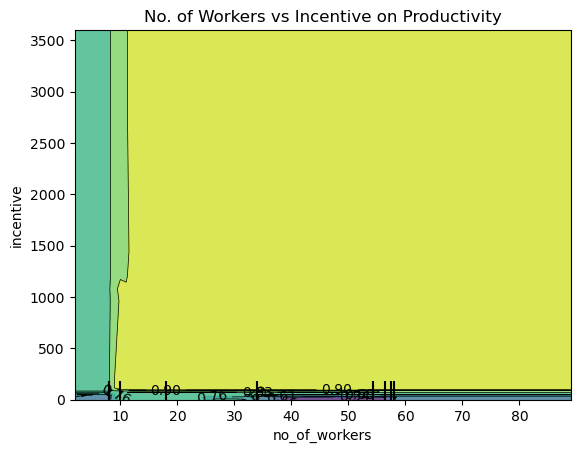

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# Fit model
model = RandomForestRegressor(random_state=42)
X = df_new[['idle_time', 'over_time', 'incentive', 'smv', 'wip', 'no_of_workers']]
y = df_new['actual_productivity']
model.fit(X, y)

# Partial dependence for interaction
PartialDependenceDisplay.from_estimator(model, X, [('no_of_workers', 'incentive')], kind='average')
plt.title('No. of Workers vs Incentive on Productivity')
plt.show()

### Sustainability Analysis

#### Derived Sustainability Metrics

In [26]:
df_new1 = df_new.copy()
df_new1.loc[:, 'productivity_per_worker'] = df_new['actual_productivity'] / df_new['no_of_workers']
df_new1.loc[:, 'idle_time_ratio'] = df_new['idle_time'] / (df_new['over_time'] + 1e-5)
df_new1.loc[:, 'productivity_per_hour'] = df_new['actual_productivity'] / (df_new['over_time'] / 60 + 1e-5)

df_new1.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df_new1.dropna(subset=['productivity_per_worker', 'idle_time_ratio', 'productivity_per_hour'], inplace=True)

#### Resource Efficiency by Department

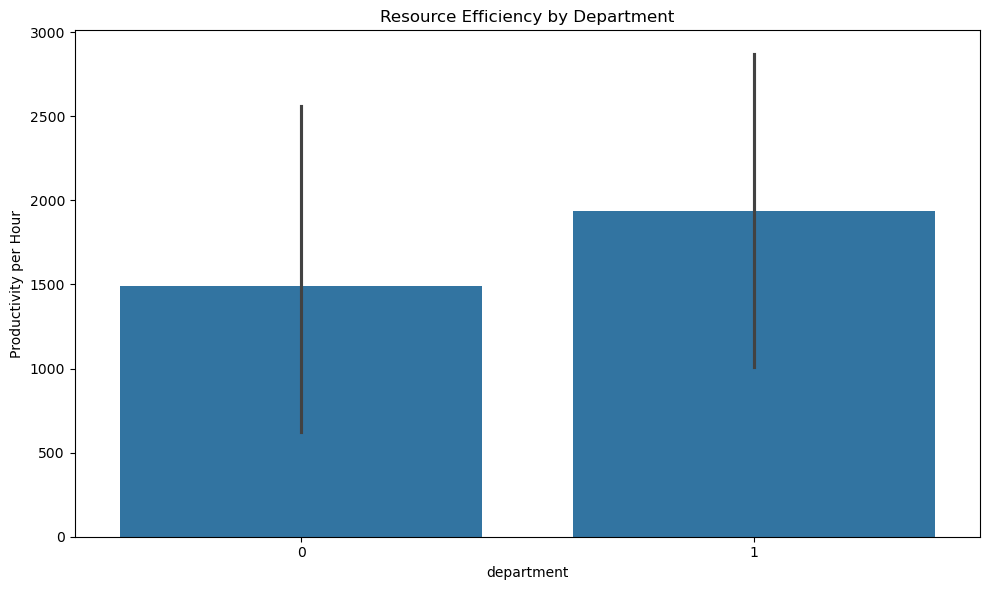

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_new1, x='department', y='productivity_per_hour')
plt.ylabel('Productivity per Hour')
plt.title('Resource Efficiency by Department')
plt.tight_layout()
plt.show()

#### Idle Time as Waste – Departmental View

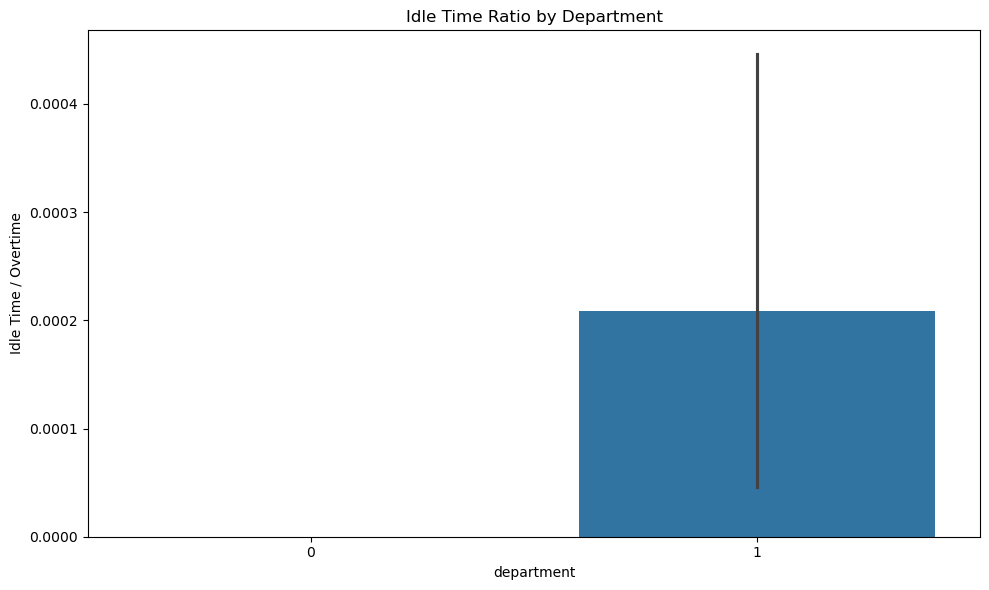

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_new1, x='department', y='idle_time_ratio')
plt.title('Idle Time Ratio by Department')
plt.ylabel('Idle Time / Overtime')
plt.tight_layout()
plt.show()

#### Sustainability Score (Efficiency – Waste)

In [192]:
dept_summary = df_new1.groupby('department').agg({
    'actual_productivity': 'mean',
    'no_of_workers': 'mean',
    'idle_time_ratio': 'mean',
    'productivity_per_hour': 'mean'
}).reset_index()


# Sustainability Score Calculation
dept_summary['sustainability_score'] = round((
    dept_summary['productivity_per_hour'] * (1 - dept_summary['idle_time_ratio'])
),2)

# Rank teams by sustainability score
dept_summary.sort_values(by='sustainability_score', ascending=False, inplace=True)

# View top performing teams
dept_summary[['department', 'sustainability_score']]

department  sustainability_score
1           1               1617.14
0           0               1493.59

## Machine Learning Implications

### Regression Analysis

### Processing the Dataset

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
features = ['no_of_workers', 'no_of_style_change', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men']
X = df_new[features]
y = df_new['actual_productivity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (useful for Gradient Boosting and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.094
Model:                             OLS   Adj. R-squared:                  0.087
Method:                  Least Squares   F-statistic:                     14.88
Date:                 Sat, 03 May 2025   Prob (F-statistic):           6.97e-21
Time:                         11:46:18   Log-Likelihood:                 471.17
No. Observations:                 1160   AIC:                            -924.3
Df Residuals:                     1151   BIC:                            -878.8
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7

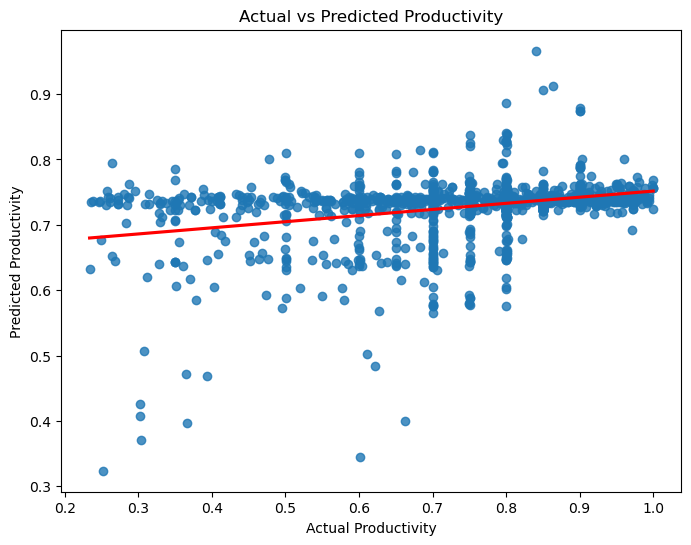

In [34]:
import statsmodels.api as sm

# Add constant for regression
X_with_const = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X_with_const).fit()

# Model summary
print(model.summary())

# Predictions
predictions = model.predict(X_with_const)

# Scatter plot of Actual vs Predicted Productivity
plt.figure(figsize=(8, 6))
sns.regplot(x=y, y=predictions, ci=None, line_kws={"color": "red"})
plt.title('Actual vs Predicted Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.show()

### Multiple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluation
print("Linear Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", linear_model.score(X_test, y_test))

Linear Regression:
Mean Absolute Error (MAE): 0.1193850255730117
Mean Squared Error (MSE): 0.023580396894230662
R-squared: 0.07773946178246138


### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", rf_model.score(X_test, y_test))

Random Forest Regression:
Mean Absolute Error (MAE): 0.07954602998256513
Mean Squared Error (MSE): 0.014268119919394999
R-squared: 0.4419549418426809


### Gradient Boosting Regression (XGBoost)

In [38]:
!pip install xgboost

In [31]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_xgb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb))
print("R-squared:", xgb_model.score(X_test_scaled, y_test))

XGBoost Regression:
Mean Absolute Error (MAE): 0.07875490591902497
Mean Squared Error (MSE): 0.012919774657540128
R-squared: 0.4946905099706962


### Support Vector Regression (SVR)

In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)  # Use scaled features for SVR

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation
print("Support Vector Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_svr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_svr))
print("R-squared:", svr_model.score(X_test_scaled, y_test))

Support Vector Regression:
Mean Absolute Error (MAE): 0.09818287027570322
Mean Squared Error (MSE): 0.01661043069668625
R-squared: 0.350344066596306


### Neural Networks

In [41]:
!pip install tensorflow

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Build the Neural Network model 
nn_model = Sequential() 
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Hidden layer
nn_model.add(Dense(32, activation='relu')) # Hidden layer 
nn_model.add(Dense(1, activation='linear')) # Output layer 

# Compile the model 
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) 

# Train the model 
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.1) 

# Predictions 
y_pred_nn = nn_model.predict(X_test_scaled) 

# Evaluation 
print("Neural Network Regression:") 
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_nn)) 
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_nn))
print("R-squared:", nn_model.evaluate(X_test_scaled, y_test, verbose=0)[1])

C:\Users\BHAVYA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2461 - mae: 0.3490 - val_loss: 0.0538 - val_mae: 0.1899
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0530 - mae: 0.1822 - val_loss: 0.0380 - val_mae: 0.1604
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mae: 0.1531 - val_loss: 0.0314 - val_mae: 0.1401
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - mae: 0.1357 - val_loss: 0.0338 - val_mae: 0.1333
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mae: 0.1279 - val_loss: 0.0542 - val_mae: 0.1300
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mae: 0.1200 - val_loss: 0.0293 - val_mae: 0.1206
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mae: 0.1256 - val_loss: 0.0348 - val_mae: 0.1179
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mae: 0.1076 - val_loss: 0.0220 - val_mae: 0.1075
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.02

### Decision Tree Regression

Decision Tree Regression:
Mean Absolute Error (MAE): 0.08180406046932188
Mean Squared Error (MSE): 0.013811633574908526
R-squared: 0.45980872707129405


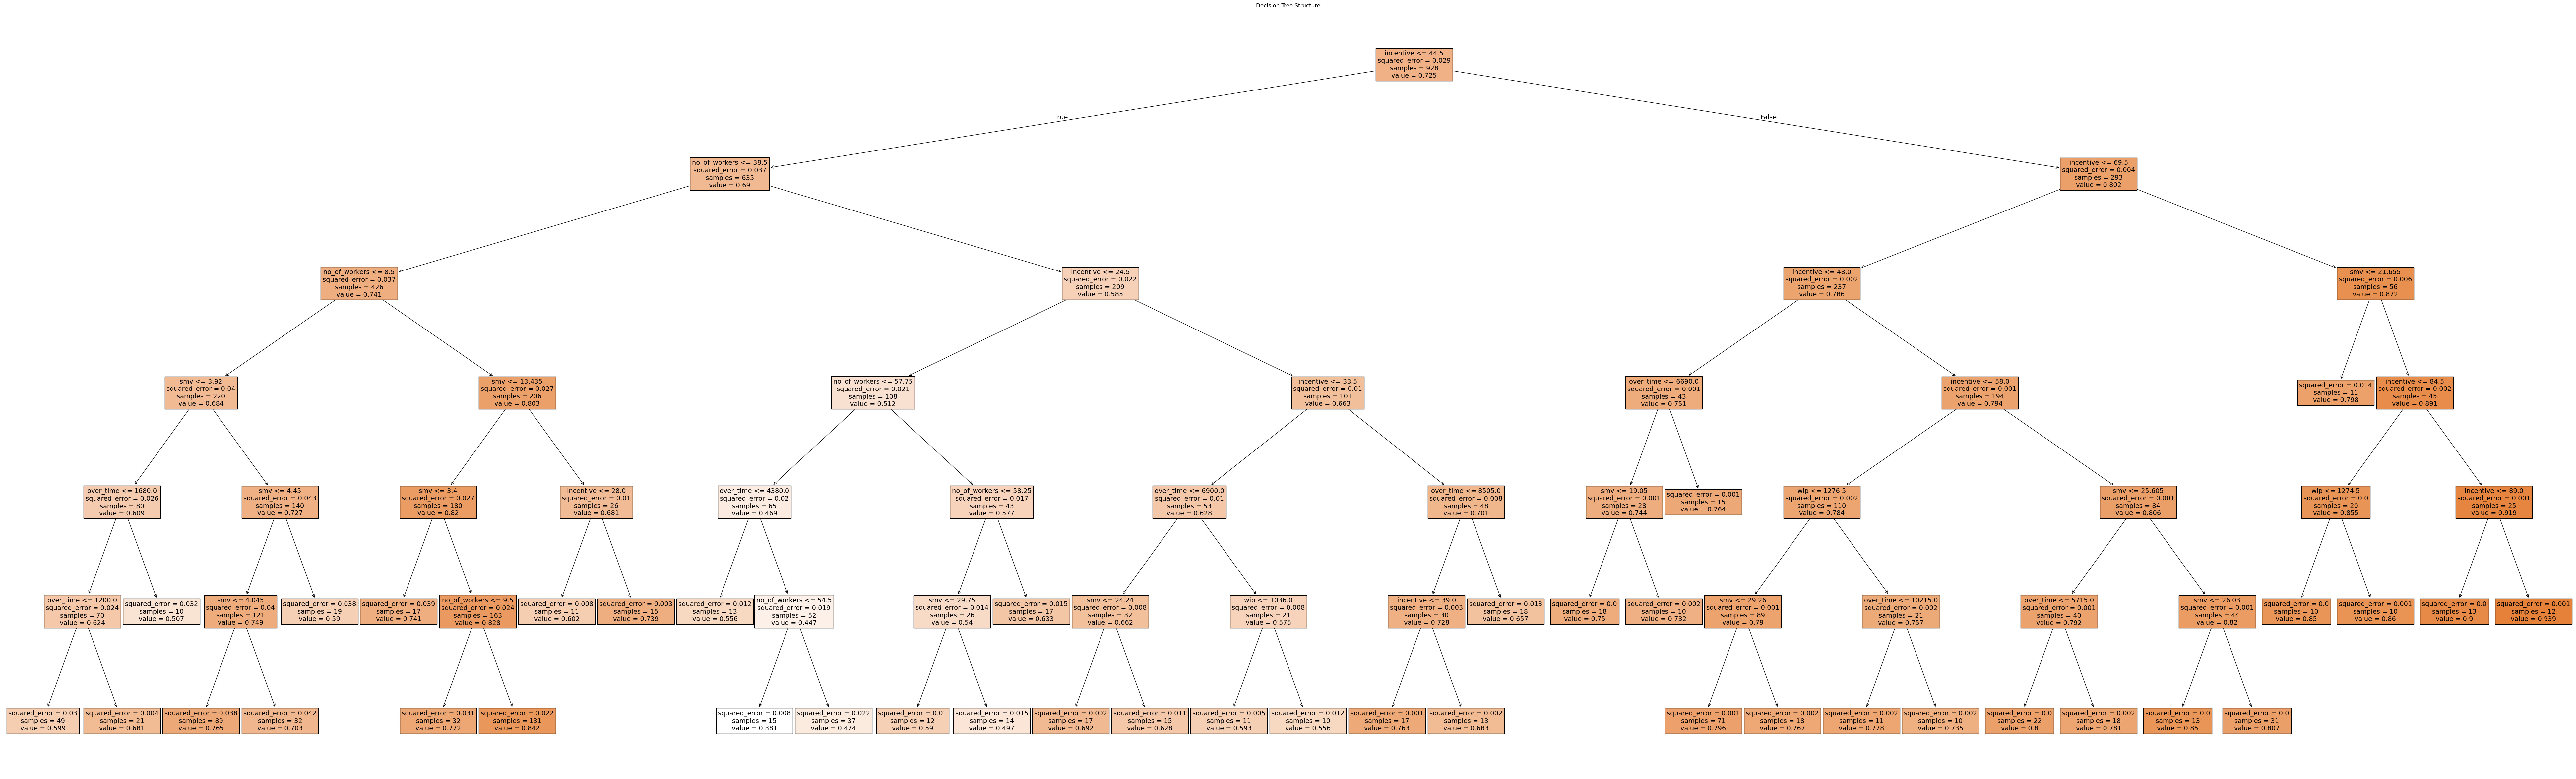

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("R-squared:", dt_model.score(X_test, y_test))

# Visualize the Decision Tree 
plt.figure(figsize=(100, 30)) 
tree.plot_tree(dt_model, feature_names=features, filled=True, fontsize=14) 
plt.title("Decision Tree Structure") 
plt.show()

## Simulation Analysis

### Forecasting (XGBoost Regression + lag)

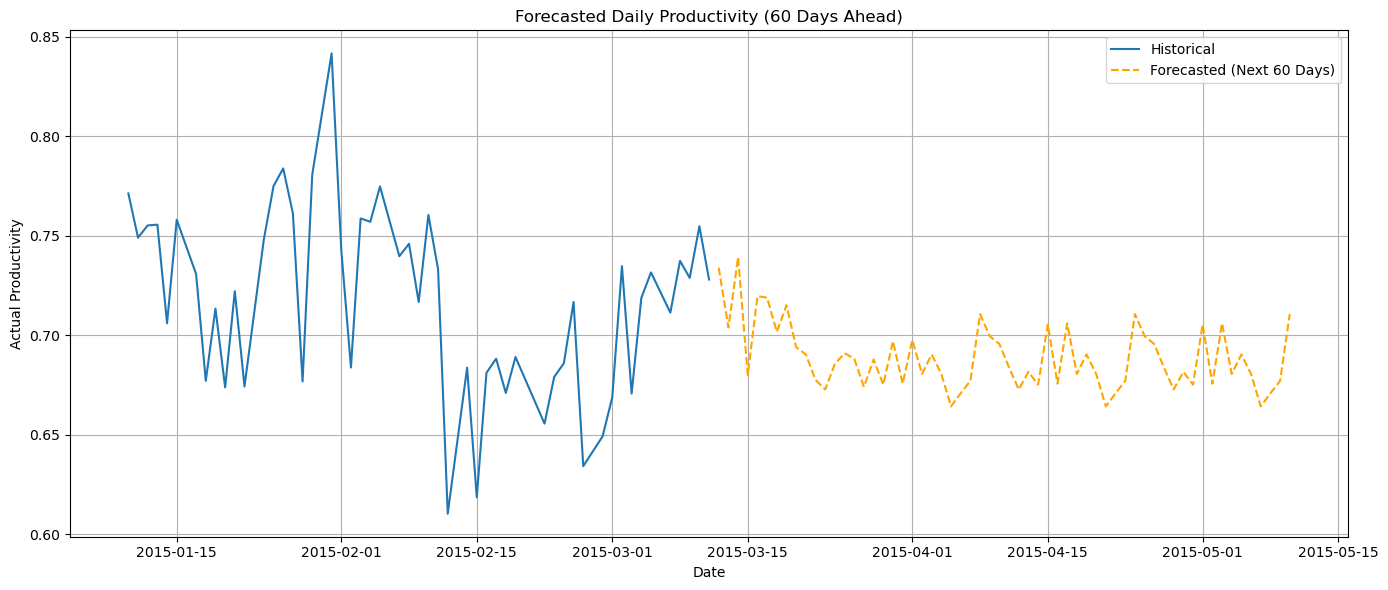

In [51]:
# Aggregate actual productivity by date
daily_df = df_new.groupby('date')['actual_productivity'].mean().reset_index()

# Create lag features
lags = [1, 2, 3, 7]
for lag in lags:
    daily_df[f'lag_{lag}'] = daily_df['actual_productivity'].shift(lag)

# Drop rows with NaNs from lagging
daily_df.dropna(inplace=True)

# Prepare training data
X = daily_df.drop(columns=['date', 'actual_productivity'])
y = daily_df['actual_productivity']

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)

# Forecast future productivity recursively
forecast_days = 60
last_known_lags = daily_df.iloc[-1][[f'lag_{lag}' for lag in lags]].values.tolist()

future_preds = []

for _ in range(forecast_days):
    # Prepare input array from current lag values
    input_array = np.array(last_known_lags).reshape(1, -1)
    pred = model.predict(input_array)[0]
    future_preds.append(pred)

    # Update lag list for next prediction (insert new pred at front)
    updated_lags = [pred] + last_known_lags[:-1]
    last_known_lags = updated_lags

# Generate future dates
last_date = daily_df['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

# Plot historical and forecasted productivity
plt.figure(figsize=(14, 6))
plt.plot(daily_df['date'], daily_df['actual_productivity'], label='Historical')
plt.plot(future_dates, future_preds, label='Forecasted (Next 60 Days)', linestyle='--', color='orange')
plt.title('Forecasted Daily Productivity (60 Days Ahead)')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Sensitivity (What-if) Analysis 

In [58]:
feature_cols = [
    'no_of_workers', 'no_of_style_change', 'smv', 'wip','over_time', 'incentive', 'idle_time', 'idle_men', 'targeted_productivity']

X = df_new[feature_cols]
y = df_new['actual_productivity']

# Train model
model = XGBRegressor(n_estimators=100)
model.fit(X, y)

# SIMULATION FUNCTION
def simulate_impact(row, features_to_modify, change_percents):
    original_pred = model.predict(row.values.reshape(1, -1))[0]
    results = []

    for feature in features_to_modify:
        for pct in change_percents:
            modified_row = row.copy()
            modified_row[feature] *= (1 + pct / 100)
            new_pred = model.predict(modified_row.values.reshape(1, -1))[0]
            results.append({
                'feature': feature,
                'change_pct': pct,
                'new_prediction': round(new_pred, 4),
                'change_in_productivity': round(new_pred - original_pred, 4)
            })
    return pd.DataFrame(results)

# Example usage with a single row (e.g., first row)
sample_row = X.iloc[0]
features = ['no_of_workers','incentive', 'smv', 'over_time']
percents = [-50, -40, -30, -20, -10, 10, 20, 30, 40, 50]

impact_df = simulate_impact(sample_row, features, percents)
print(impact_df)

          feature  change_pct  new_prediction  change_in_productivity
0   no_of_workers         -50          0.8483                 -0.0978
1   no_of_workers         -40          0.8635                 -0.0826
2   no_of_workers         -30          0.9114                 -0.0347
3   no_of_workers         -20          0.9114                 -0.0347
4   no_of_workers         -10          0.9088                 -0.0373
5   no_of_workers          10          0.9325                 -0.0136
6   no_of_workers          20          0.9325                 -0.0136
7   no_of_workers          30          0.9325                 -0.0136
8   no_of_workers          40          0.9325                 -0.0136
9   no_of_workers          50          0.9325                 -0.0136
10      incentive         -50          0.7899                 -0.1561
11      incentive         -40          0.8066                 -0.1394
12      incentive         -30          0.8559                 -0.0902
13      incentive   

### Goal Seek Analysis

In [48]:
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Replace the dictionary with the actual DataFrame columns
X = np.column_stack((
    df_new['no_of_workers'], 
    df_new['over_time'], 
    df_new['idle_time'], 
    df_new['incentive'], 
    df_new['smv'], 
    df_new['wip']
))
y = df_new['actual_productivity']

# Fit a linear regression model (you could use other models as needed)
model = LinearRegression()
model.fit(X, y)

print("Model R-squared:", model.score(X, y))
print("Model MSE:", mean_squared_error(y, model.predict(X)))

# Function to calculate the predicted productivity after a percentage change in a variable
def predicted_productivity_after_change(variable_index, change_percentage, data, model):
    modified_data = data.copy()
    modified_data[:, variable_index] = modified_data[:, variable_index] * (1 + change_percentage / 100)
    return model.predict(modified_data)

# Goal Seek function to minimize the difference between predicted and targeted productivity
def objective(change_percentage, variable_index, data, model, target_productivity):
    modified_data = np.column_stack((
        data['no_of_workers'], 
        data['over_time'], 
        data['idle_time'], 
        data['incentive'], 
        data['smv'], 
        data['wip']
    ))
    predicted_productivity = predicted_productivity_after_change(variable_index, change_percentage, modified_data, model)
    
    # Calculate the mean squared error between predicted and target
    error = np.sum((predicted_productivity - target_productivity) ** 2)
    return error

variable_names = ['no_of_workers', 'over_time', 'idle_time', 'incentive', 'smv', 'wip']

# Loop through each variable index to calculate the optimal percentage change
for i, var_name in enumerate(variable_names):
    # Initial guess for the percentage change (starting point for the optimizer)
    initial_guess = 0  # No initial change

    # Call the optimization function to find the best percentage change for this variable
    result = minimize(objective, initial_guess, args=(i, df_new, model, df_new['targeted_productivity']))

    # Optimal percentage change in the selected variable to reach target productivity
    optimal_percentage_change = result.x[0]

    # Print the result for the current variable
    print(f"Optimal percentage change in {var_name} to achieve target productivity: {optimal_percentage_change:.2f}%")

Model R-squared: 0.04309702240677982
Model MSE: 0.027437160828433373
Optimal percentage change in no_of_workers to achieve target productivity: 5.07%
Optimal percentage change in over_time to achieve target productivity: 20.07%
Optimal percentage change in idle_time to achieve target productivity: -67.92%
Optimal percentage change in incentive to achieve target productivity: -71.58%
Optimal percentage change in smv to achieve target productivity: -10.32%
Optimal percentage change in wip to achieve target productivity: -36.89%


In [50]:
from xgboost import XGBRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare Datra
features = ['no_of_workers', 'over_time', 'idle_time', 'incentive', 'smv', 'wip']
target_col = 'actual_productivity'

X = df_new[features].values
y = df_new[target_col].values
target_y = df_new['targeted_productivity'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit XGB Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Optional: check model accuracy
baseline_preds = xgb_model.predict(X_test)
print("R-squared:", xgb_model.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, baseline_preds))

# Optimization Setup
# Function to apply percentage changes to a data row
def apply_percentage_changes(data_row, changes_percent):
    modified_row = data_row.copy()
    modified_row = modified_row * (1 + np.array(changes_percent) / 100)
    return modified_row.reshape(1, -1)

# Objective function: minimize the squared error from target productivity
def objective_single(change_percentages, data_row, model, target_productivity):
    modified_row = apply_percentage_changes(data_row, change_percentages)
    predicted = model.predict(modified_row)[0]
    return (predicted - target_productivity[0]) ** 2

# Use average row from data as representative case
X_avg = np.mean(X, axis=0)
target_avg = np.mean(target_y)

# Initial guess and bounds
initial_guess = [0] * len(features)  # No change
bounds = [(-100, 100)] * len(features)  # Allow wider exploration

# Run Optimization
result = minimize(
    objective_single,
    initial_guess,
    args=(X_avg, xgb_model, [target_avg]),
    bounds=bounds,
    method='L-BFGS-B'
)

# Show Results
optimal_changes = result.x
print("\nOptimal percentage changes (to reach target productivity):")
for feature, change in zip(features, optimal_changes):
    print(f"{feature}: {change:.2f}%")

R-squared: 0.46293900718179615
MSE: 0.01373159843913397

Optimal percentage changes (to reach target productivity):
no_of_workers: 0.00%
over_time: 0.00%
idle_time: 0.00%
incentive: 0.00%
smv: 0.00%
wip: 0.00%
